Implementar un modelo predictivo utilizando redes neuronales convolutivas para el reconocimiento de imágenes en Python

El conjunto de datos Fashion-MNIST es un conjunto de datos de imágenes de artículos de Zalando, con imágenes en escala de grises de 28x28 de 70 000 productos de moda de 10 categorías y 7000 imágenes por categoría. El conjunto de entrenamiento tiene 60.000 imágenes y el conjunto de prueba tiene 10.000 imágenes. ¡Puede verificar esto más tarde cuando haya cargado sus datos! ;)

Cargar los datos
Keras viene con una biblioteca llamada datasets, que puede usar para cargar conjuntos de datos listos para usar: descarga los datos del servidor y acelera el proceso, ya que ya no tiene que descargar los datos a su computadora. Las imágenes del tren y de la prueba, junto con las etiquetas, se cargan y almacenan en las variables train_X, train_Y, test_X, test_Y, respectivamente.





Realice lo siguiente:
1. Obtenga el tamaño de los datos de test y testeo, además de las dimensiones de las imágenes.
2. Obtenga las categorías de la base
3. Visualice sus datos.

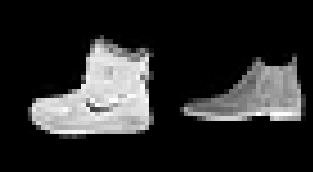

4. Convierta cada imagen de 28 x 28 del tren y del equipo de prueba en una matriz de tamaño 28 x 28 x 1 que se alimenta a la red. Además, debe convertir su tipo a float32, y también debe volver a escalar los valores de píxel en el rango 0 - 1 inclusive.
5. Convierta las etiquetas de entrenamiento y prueba en vectores de codificación one-hot.
6. Separar datos de entrenamiento y testeo
7. Para modelar sus datos, utilice los siguientes paquetes:

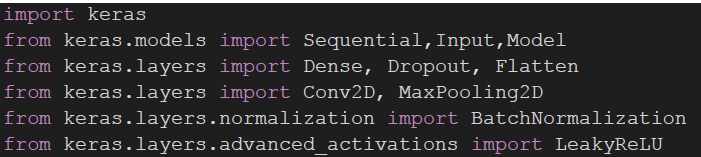

Usará un tamaño de lote de 64 y también es preferible usar un tamaño de lote más alto de 128 o 256, todo depende de la memoria. Contribuye enormemente a determinar los parámetros de aprendizaje y afecta la precisión de la predicción. Entrenarás la red durante 20 épocas.

8. Agregue la capa de agrupación máxima con MaxPooling2D() y así
sucesivamente.
9. Compilación y visualización del modelo


In [ ]:
!pip install tensorflow

In [39]:
import numpy as np
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.text import Text

from sklearn.model_selection import train_test_split

# Importar las bibliotecas necesarias de Keras
import keras
from keras.utils import to_categorical
from keras.utils import plot_model
#from keras.datasets import fashion_mnist
#from keras.models import Sequential
from keras.models import Sequential,Model
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense, Dropout
#from keras.layers.normalization import BatchNormalization
#from keras.layers.advanced_activations import LeakyReLU
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU

In [40]:
# Cargar el conjunto de datos Fashion MNIST
from keras.datasets import fashion_mnist
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

**1.** Obtenga el tamaño de los datos de test y testeo, además de las dimensiones de las imágenes.

In [43]:
# Mostrar columnas y filas
# Imprimir la forma de los datos de entrenamiento y prueba
print('Tamaño de los datos de entrenamiento : ', train_X.shape, train_Y.shape)
print('Tamaño de los datos de prueba : ', test_X.shape, test_Y.shape)

Tamaño de los datos de entrenamiento :  (60000, 28, 28) (60000,)
Tamaño de los datos de prueba :  (10000, 28, 28) (10000,)


In [42]:
# Dimensiones de las imágenes
image_shape = train_X.shape[1:]
print("Dimensiones de las imágenes:", image_shape)

Dimensiones de las imágenes: (28, 28)


**2.** Obtenga las categorías de la base

In [ ]:
# Encontrar los números únicos de las etiquetas de entrenamiento
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

plt.figure(figsize=[5,5])

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

**3.** Visualice sus datos.

Text(0.5, 1.0, 'Ground Truth : 9')

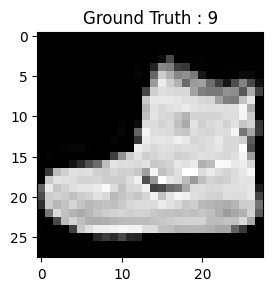

In [ ]:
# Mostrar la primera imagen en los datos de entrenamiento
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

Text(0.5, 1.0, 'Ground Truth : 9')

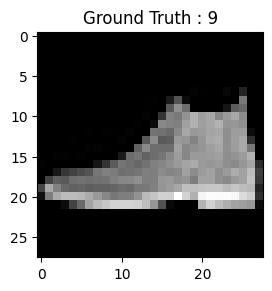

In [ ]:
# Mostrar la primera imagen en los dtos de prueba
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))
Text(0.5, 1.0, 'Ground Truth : 9')

**4.** Convierta cada imagen de 28 x 28 del tren y del equipo de prueba en una matriz de tamaño 28 x 28 x 1 que se alimenta a la red. Además, debe convertir su tipo a float32, y también debe volver a escalar los valores de píxel en el rango 0 - 1 inclusive.

In [ ]:
# Cambiar forma de imagen
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X.shape, test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [ ]:
# Convertir a tipo float32
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

**5.** Convierta las etiquetas de entrenamiento y prueba en vectores de codificación one-hot.

In [ ]:
# Cambiar las etiquetas de categóricas a one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

In [ ]:
# Mostrar el cambio para etiqueta categoría usando one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 9
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


**6.** Separar datos de entrenamiento y testeo

In [ ]:
# Dividir datos
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [ ]:
# Mostrar forma
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

**7.** Para modelar sus datos, utilice los siguientes paquetes: (Imagen con los paquetes a usar, se importaron arriba)

Usará un tamaño de lote de 64 y también es preferible usar un tamaño de lote más alto de 128 o 256, todo depende de la memoria. Contribuye enormemente a determinar los parámetros de aprendizaje y afecta la precisión de la predicción. Entrenarás la red durante 20 épocas.

**8.** Agregue la capa de agrupación máxima con MaxPooling2D() y así
sucesivamente.

In [ ]:
# Definir variables
batch_size = 64
epochs = 20
num_classes = 10

fashion_model = Sequential() #Conv2D() define como Red Neuronal Convolucional
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(Dense(num_classes, activation='softmax'))

**9.** Compilación y visualización del modelo

In [ ]:
# Compilar el modelo
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
fashion_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                   

In [ ]:
# Entrenar el modelo
fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/20
750/750 [==============================] - 88s 115ms/step - loss: 0.4630 - accuracy: 0.8307 - val_loss: 0.3493 - val_accuracy: 0.8699
Epoch 2/20
750/750 [==============================] - 93s 124ms/step - loss: 0.2874 - accuracy: 0.8964 - val_loss: 0.2782 - val_accuracy: 0.8991
Epoch 3/20
750/750 [==============================] - 87s 116ms/step - loss: 0.2410 - accuracy: 0.9113 - val_loss: 0.2473 - val_accuracy: 0.9096
Epoch 4/20
750/750 [==============================] - 91s 121ms/step - loss: 0.2089 - accuracy: 0.9234 - val_loss: 0.2383 - val_accuracy: 0.9146
Epoch 5/20
750/750 [==============================] - 87s 116ms/step - loss: 0.1865 - accuracy: 0.9321 - val_loss: 0.2454 - val_accuracy: 0.9118
Epoch 6/20
750/750 [==============================] - 90s 119ms/step - loss: 0.1641 - accuracy: 0.9387 - val_loss: 0.2727 - val_accuracy: 0.9078
Epoch 7/20
750/750 [==============================] - 92s 122ms/step - loss: 0.1416 - accuracy: 0.9472 - val_loss: 0.2422 - val_ac

In [48]:
# Probar el modelo
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=0)

In [ ]:
# Evaluar el modelo
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.4415169954299927
Test accuracy: 0.9176999926567078


In [49]:
# Predecir etiqeutas
predicted_classes = fashion_model.predict(test_X)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
predicted_classes.shape, test_Y.shape

313/313 [==============================] - 6s 20ms/step


((10000,), (10000,))

Found 9170 correct labels


<ipython-input-35-16a1f03d5f3c>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i+1)


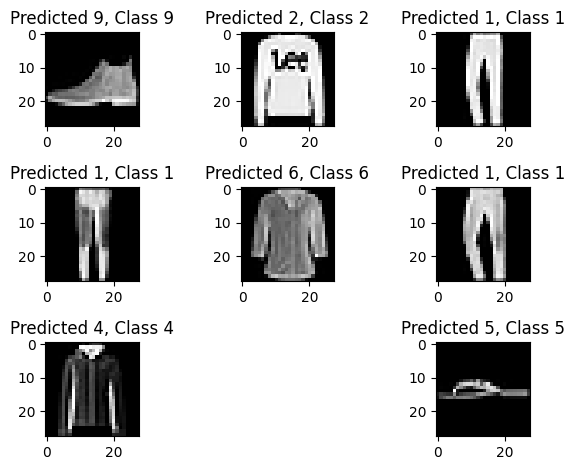

In [ ]:
# Graficar etiquetas correctas
correct = np.where(predicted_classes==test_Y)[0]
print ("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_Y[correct]))
    plt.tight_layout()

Found 830 incorrect labels


<ipython-input-36-cea5ea609cf5>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i+1)


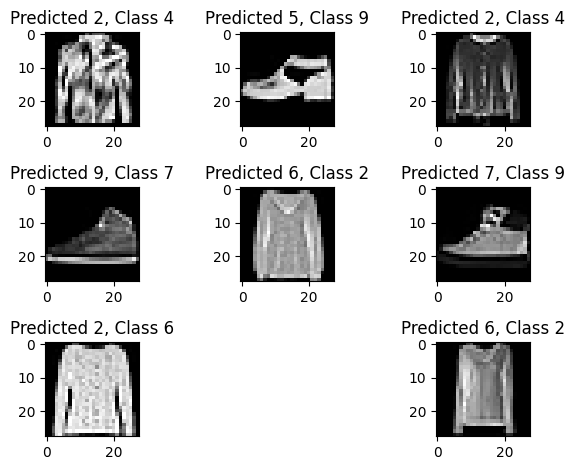

In [ ]:
# Graficar etiquetas incorrectas
incorrect = np.where(predicted_classes!=test_Y)[0]
print ("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], test_Y[incorrect]))
    plt.tight_layout()

In [ ]:
# Reporte de clasificación
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.87      0.83      0.85      1000
     Class 1       0.99      0.98      0.99      1000
     Class 2       0.87      0.87      0.87      1000
     Class 3       0.91      0.92      0.91      1000
     Class 4       0.88      0.87      0.87      1000
     Class 5       0.98      0.99      0.98      1000
     Class 6       0.76      0.78      0.77      1000
     Class 7       0.97      0.96      0.97      1000
     Class 8       0.97      0.99      0.98      1000
     Class 9       0.97      0.98      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

